# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip install citipy

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import datetime
import matplotlib.dates as mdate
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../WeatherPy/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

637

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
base_url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + weather_api_key

# Counters
city_counter = 1
set_counter = 1

# Create the lists to hold relative data
cities_list= []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

print("Started")

# Create a query url for each city in the cities list to get json response
for i, city in enumerate(cities):
    
    # Group cities as sets of 50s
    if (i % 50 == 0 and i >= 50):
        set_counter += 1
        city_counter = 1
         
    # Create API url for each city
    query_url = base_url +"&q=" + city
    
    # Get json respose for each city
    response = requests.get(query_url).json()
    
    # Print the results 
    print(f"Processing Record {city_counter} of Set {set_counter} | {city}")
    
    # Increase city counter
    city_counter += 1
    
   # Add the values to the lists
    try:       
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        cities_list.append(response["name"])
    except:
        print("City not found. Skipping...")
        pass
        
print("Completed")

Started
Processing Record 1 of Set 1 | dikson
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | lichinga
Processing Record 4 of Set 1 | sao joao da barra
Processing Record 5 of Set 1 | dalnerechensk
Processing Record 6 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 7 of Set 1 | nanga eboko
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | mareeba
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | oxbow
Processing Record 14 of Set 1 | amderma
City not found. Skipping...
Processing Record 15 of Set 1 | todos santos
Processing Record 16 of Set 1 | ifanadiana
Processing Record 17 of Set 1 | bredasdorp
Processing Record 18 of Set 1 | yantal
Processing Record 19 of Set 1 | kadnikov
Processing Record 20 of Set 1 | pisco
Processing Record 21 of Set 1 | cape town
Processing Record 22 of Set 1 | illoqqortoormiut
City not found. Skip

Processing Record 41 of Set 4 | prieska
Processing Record 42 of Set 4 | clarence town
Processing Record 43 of Set 4 | matara
Processing Record 44 of Set 4 | bambous virieux
Processing Record 45 of Set 4 | ngukurr
City not found. Skipping...
Processing Record 46 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 47 of Set 4 | cidreira
Processing Record 48 of Set 4 | sungaipenuh
Processing Record 49 of Set 4 | jamestown
Processing Record 50 of Set 4 | inta
Processing Record 1 of Set 5 | mayya
Processing Record 2 of Set 5 | yeppoon
Processing Record 3 of Set 5 | ciudad del maiz
Processing Record 4 of Set 5 | labutta
City not found. Skipping...
Processing Record 5 of Set 5 | kenai
Processing Record 6 of Set 5 | uray
Processing Record 7 of Set 5 | kayerkan
Processing Record 8 of Set 5 | eydhafushi
Processing Record 9 of Set 5 | muzhi
Processing Record 10 of Set 5 | seoul
Processing Record 11 of Set 5 | zhigansk
Processing Record 12 of Set 5 | rosarito
Processing Record 13

Processing Record 26 of Set 8 | saldanha
Processing Record 27 of Set 8 | batouri
Processing Record 28 of Set 8 | san patricio
Processing Record 29 of Set 8 | sheregesh
Processing Record 30 of Set 8 | kasongo-lunda
Processing Record 31 of Set 8 | contamana
Processing Record 32 of Set 8 | hami
Processing Record 33 of Set 8 | saint-augustin
Processing Record 34 of Set 8 | samarinda
Processing Record 35 of Set 8 | sibenik
Processing Record 36 of Set 8 | avera
Processing Record 37 of Set 8 | sinkat
City not found. Skipping...
Processing Record 38 of Set 8 | brekstad
Processing Record 39 of Set 8 | cherskiy
Processing Record 40 of Set 8 | namibe
Processing Record 41 of Set 8 | damaturu
Processing Record 42 of Set 8 | aquiraz
Processing Record 43 of Set 8 | acapulco
Processing Record 44 of Set 8 | iskateley
Processing Record 45 of Set 8 | paraiso
Processing Record 46 of Set 8 | hay river
Processing Record 47 of Set 8 | boromo
Processing Record 48 of Set 8 | antibes
Processing Record 49 of Set

Processing Record 19 of Set 12 | abu samrah
Processing Record 20 of Set 12 | svetlaya
Processing Record 21 of Set 12 | mehamn
Processing Record 22 of Set 12 | santa cruz
Processing Record 23 of Set 12 | kano
Processing Record 24 of Set 12 | aykhal
Processing Record 25 of Set 12 | vila do maio
Processing Record 26 of Set 12 | tirat karmel
Processing Record 27 of Set 12 | pithapuram
Processing Record 28 of Set 12 | mehran
Processing Record 29 of Set 12 | gangotri
City not found. Skipping...
Processing Record 30 of Set 12 | jermuk
Processing Record 31 of Set 12 | san rafael
Processing Record 32 of Set 12 | upala
Processing Record 33 of Set 12 | lasa
Processing Record 34 of Set 12 | pinehurst
Processing Record 35 of Set 12 | mykhaylivka
Processing Record 36 of Set 12 | siare
City not found. Skipping...
Processing Record 37 of Set 12 | hofn
Processing Record 38 of Set 12 | necochea
Processing Record 39 of Set 12 | nyrob
Processing Record 40 of Set 12 | filadelfia
Processing Record 41 of Set

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create a dictionary to keep data 
weather_data = {
     "City": cities_list,
     "Cloudiness": cloudiness,
     "Country": country,
     "Date": date,
     "Humidity": humidity,
     "Lat": lat,
     "Lng": lng,
     "Max Temp": max_temp,
     "Wind Speed": wind_speed    
 }

# Create the data frame and count variables for each columns
weather_df = pd.DataFrame(weather_data)
weather_df.count()

City          589
Cloudiness    589
Country       589
Date          589
Humidity      589
Lat           589
Lng           589
Max Temp      589
Wind Speed    589
dtype: int64

In [6]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Dikson,0,RU,1616157756,96,73.5069,80.5464,-31.23,8.08
1,Yellowknife,40,CA,1616157756,79,62.4560,-114.3525,14.00,9.22
2,Lichinga,75,MZ,1616157757,69,-13.3128,35.2406,77.00,6.91
3,São João da Barra,0,BR,1616157757,69,-21.6403,-41.0511,82.40,6.91
4,Dalnerechensk,0,RU,1616157469,86,45.9339,133.7225,22.12,3.31


In [7]:
weather_df.to_csv(output_data_file, index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
weather_df = pd. read_csv("../WeatherPy/cities.csv")
print(weather_df)
index = weather_df. index
condition = weather_df["Humidity"] > 100
cities_indices = index[weather_df["Humidity"] > 100] 
cities_indices_list = cities_indices
print(cities_indices_list)

                  City  Cloudiness Country        Date  Humidity      Lat  \
0               Dikson           0      RU  1616157756        96  73.5069   
1          Yellowknife          40      CA  1616157756        79  62.4560   
2             Lichinga          75      MZ  1616157757        69 -13.3128   
3    São João da Barra           0      BR  1616157757        69 -21.6403   
4        Dalnerechensk           0      RU  1616157469        86  45.9339   
..                 ...         ...     ...         ...       ...      ...   
584      Mount Gambier           0      AU  1616157886        88 -37.8333   
585    Plettenberg Bay          65      ZA  1616157908        78 -34.0527   
586    Puerto Colombia          40      CO  1616157809        83  10.9878   
587           Sri Aman           0      MY  1616157908        89   1.2376   
588             Añisoc          95      GQ  1616157908        69   1.8658   

          Lng  Max Temp  Wind Speed  
0     80.5464    -31.23        8.08  

In [68]:
#  Get the indices of cities that have humidity over 100%.
no data with cities having humidity over 100%.

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

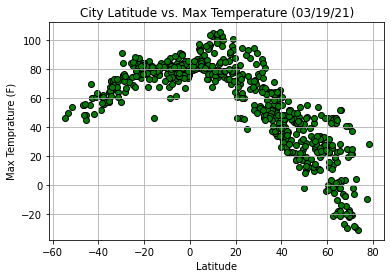

In [9]:
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker = "o", facecolor = "green", edgecolor="black")
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temprature (F)")
plt.grid()
plt.savefig("../WeatherPy/temperature.png")
plt.show()


In [ ]:
Analysis:Looking at the latitude and maximum temprature plot we can say as cities get closer to the equator,
         tempratures tend to get higher

## Latitude vs. Humidity Plot

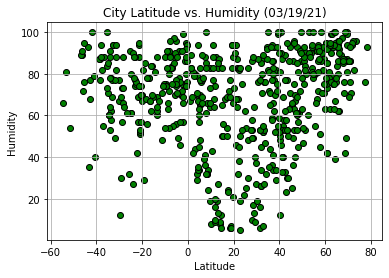

In [10]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker = "o", facecolor = "green", edgecolor="black")
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
plt.savefig("../WeatherPy/humidity.png")
plt.show()


In [ ]:
Analysis: For humidity, the plot doesnt show any relation between latitude and humidity. 
          Humidity doesn get higher or lower as we get closer to the equator. 
          Different latitudes can have similar humidity rates, or similar latidues can have different humidity rates.

## Latitude vs. Cloudiness Plot

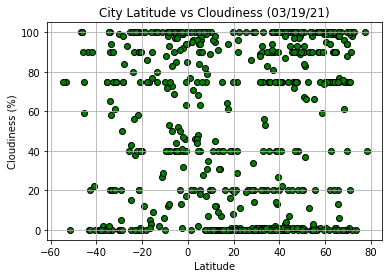

In [11]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker = "o", facecolor = "green", edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (%s)" % time.strftime("%x"))
plt.grid()
plt.savefig("../WeatherPy/cloudliness.png")
plt.show()

In [ ]:
Analysis: For cloudiness, again we cant point any relation between latitude and cloudiness as we get closer to the equator.
          Cities that are closer to the equator dont show any trend like they have any similarity for cloudiness.

## Latitude vs. Wind Speed Plot

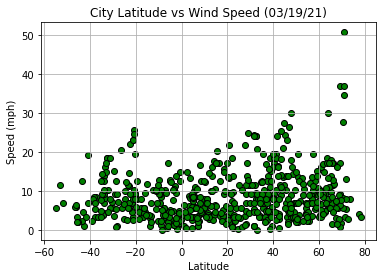

In [12]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker = "o", facecolor = "green", edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Speed (mph)")
plt.title("City Latitude vs Wind Speed (%s)" % time.strftime("%x"))
plt.grid()
plt.savefig("../WeatherPy/windspeed.png")
plt.show()

In [ ]:
Analysis:For wind speed, the plot shows cities that have very diffirent latitudes can have similar wind speeds, and similar latitudes doesnt necessarily have the similar wind speeds.
         So we can say latitude and wind speed doesnt create a trend.

## Linear Regression

In [51]:
def linear_reg_plot(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
    plt.xlabel("Latitude")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [52]:
Northern_hemisphere = weather_df.loc[weather_df["Lat"]>0]
Southern_hemisphere = weather_df.loc[weather_df["Lat"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8768552068391039


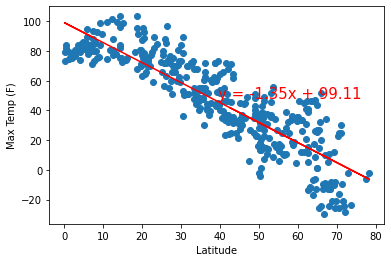

None


In [53]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Max Temp"]
plt.ylabel("Max Temp (F)")
print(linear_reg_plot(x_values,y_values))

In [ ]:
The Max Temperature vs. Latitude plot for cities in the northern hemisphere is shown above. 
The max temperature appears show a strong negative linear relationship with latitudes in the northern hemisphere, 
with an r-value of -0.87 for the linear best-fit regression line.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7723103655727277


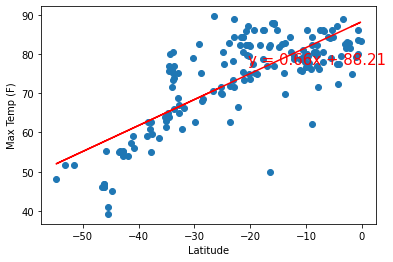

None


In [54]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Max Temp"]
plt.ylabel("Max Temp (F)")
print(linear_reg_plot(x_values,y_values))

In [ ]:
The Max Temperature vs. Latitude plot for cities in the southern hemisphere is shown above. 
The max temperature appears show a strong positive linear relationship with latitudes in the southern hemisphere, 
with an r-value of 0.77 for the linear best-fit regression line.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.30506937710980997


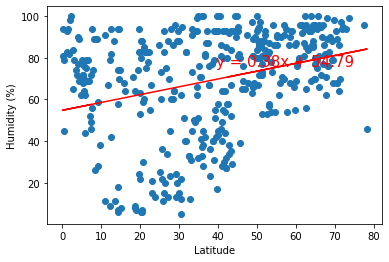

None


In [55]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Humidity"]
plt.ylabel("Humidity (%)")
print(linear_reg_plot(x_values,y_values))


In [ ]:
The Humidity vs. Latitude plot for cities in the northern hemisphere is shown above. 
The data seems to show no relationship between the humidity and latitude for the northern hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.09089000468702331


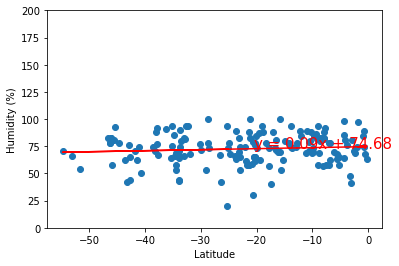

None


In [56]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Humidity"]
plt.ylim(0, y_values.max()+100)
plt.ylabel("Humidity (%)")
print(linear_reg_plot(x_values,y_values))

In [ ]:
The Humidity vs. Latitude plot for cities in the southern hemisphere is shown above. 
The data seems to show no relationship between the humidity and latitude for the southern hemisphere.



####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.16693033427359874


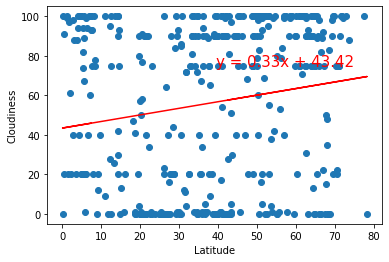

None


In [57]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Cloudiness"]
plt.ylabel("Cloudiness")
print(linear_reg_plot(x_values,y_values))

In [ ]:
The Cloudiness vs. Latitude plot for cities in the northern hemisphere is shown above. 
The data seems to show no relationship between cloudiness and latitude for the northern hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.3496020568286428


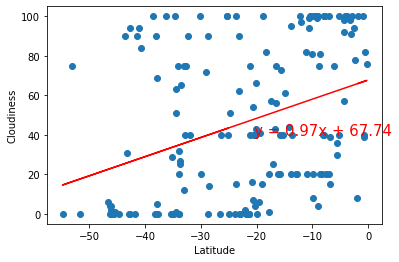

None


In [58]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Cloudiness"]
plt.ylabel("Cloudiness")
print(linear_reg_plot(x_values,y_values))

In [ ]:
The Cloudiness vs. Latitude plot for cities in the southern hemisphere is shown above. 
The data seems to show no relationship between cloudiness and latitude for the southern hemisphere.



####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.07113402334003938


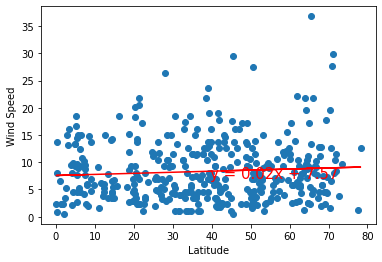

None


In [59]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed")
print(linear_reg_plot(x_values,y_values))

In [ ]:
The Wind Speed vs. Latitude plot for cities in the northern hemisphere is shown above. 
The data seems to show no relationship between wind speed and latitude for the northern hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.34026691027673484


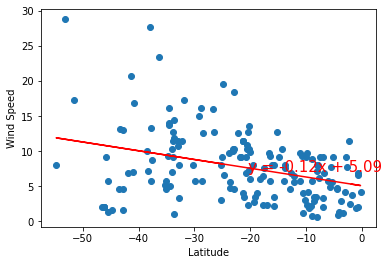

None


In [60]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed")
print(linear_reg_plot(x_values,y_values))

In [ ]:
The Wind Speed vs. Latitude plot for cities in the southern hemisphere is shown above. 
The data seems to show no relationship between wind speed and latitude for the southern hemisphere.